In [7]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
trainxfile = "TrainX.csv"
trainyfile = "TrainY.csv"
testfile1x = "Test1000set1X.csv"
testfile1y = "Test1000set1Y.csv"
testfile2x = "Test1000set2X.csv"
testfile2y = "Test1000set2Y.csv"
predictionfile = "predictions_ant.csv"
lossfile = "loss_ant.csv"
val_lossfile = "val_loss_ant.csv"
final_errors_file = "final_errors_.csv"

In [9]:
raw_dataset = pd.read_csv(trainyfile, header=None)
trainy = raw_dataset.copy()
print(trainy.shape)

(100000, 240)


In [10]:
raw_dataset = pd.read_csv(trainxfile, header=None)
trainx = raw_dataset.copy()
print(trainx.shape)

(100000, 200)


In [11]:
raw_testset = pd.read_csv(testfile1x, header=None)
testx = raw_testset.copy()
raw_testset = pd.read_csv(testfile1y, header=None)
testy = raw_testset.copy()
print(testx.shape,testy.shape)

(1000, 200) (1000, 240)


In [12]:
raw_testset2 = pd.read_csv(testfile2x, header=None)
val_testx = raw_testset2.copy()
raw_testset2 = pd.read_csv(testfile2y, header=None)
val_testy = raw_testset2.copy()

In [13]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [14]:
train_stats = trainx.describe()

In [15]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
0,100000.0,-188.319415,59.452533,-349.49,-232.67000,-195.86000,-151.63000,15.602
1,100000.0,-123.379875,52.703415,-270.85,-162.52000,-129.08000,-90.34000,57.396
2,100000.0,-68.870584,45.407216,-202.05,-101.90000,-72.72200,-39.81675,91.463
3,100000.0,-25.546657,39.356731,-148.41,-53.49600,-27.70400,1.01395,111.860
4,100000.0,6.638707,36.089138,-139.41,-18.17325,6.60615,32.19600,127.390
...,...,...,...,...,...,...,...,...
195,100000.0,88.360678,39.042400,-100.57,61.16900,80.27950,108.82000,252.910
196,100000.0,111.629749,35.630700,-104.06,91.19375,107.28000,130.79000,252.950
197,100000.0,120.675379,34.753567,-107.01,107.40000,121.56000,139.03000,230.960
198,100000.0,115.959027,36.594716,-128.43,106.05750,123.30000,136.01000,215.690


In [16]:
normed_train_data = norm(trainx)
normed_test_data = norm(testx)
normed_val_data = norm(val_testx)

In [17]:
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate

In [18]:
visible = Input(shape=(len(trainx.keys()),))
hidden1 = Dense(256, activation='relu')(visible)
hidden2 = Dense(256, activation='relu')(hidden1)
hidden3 = Dense(256, activation='relu')(hidden2)
merge = concatenate([hidden3, visible])
hidden4 = Dense(256, activation='relu')(merge)
outlar = Dense(240)(hidden4)
model = Model(inputs=visible, outputs=outlar)
print("Model is ready!")

Model is ready!


In [19]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          51456       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          65792       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 256)          65792       dense_1[0][0]                    
_______________________________________________________________________________________

In [20]:
model.compile(optimizer='adamax', loss=['mse'])

In [21]:
EPOCHS = 200
history = model.fit(
  normed_train_data, (trainy-1.0)/3.0,
  epochs=EPOCHS, validation_data = (normed_val_data,(val_testy-1.0)/3.0), verbose=1)

Epoch 1/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0449 - val_loss: 0.0354
Epoch 2/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0326 - val_loss: 0.0302
Epoch 3/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0282 - val_loss: 0.0274
Epoch 4/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0253 - val_loss: 0.0240
Epoch 5/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0233 - val_loss: 0.0245
Epoch 6/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0219 - val_loss: 0.0211
Epoch 7/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0208 - val_loss: 0.0195
Epoch 8/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0199 - val_loss: 0.0201
Epoch 9/200
3125/3125 [==============================] - 6s 2ms/step - loss: 0.0191 - val_loss: 0.0180
Epoch 10/200
3125/3125 [==============================] - 6s 2ms/step - l

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,0.008370,0.008295,195
196,0.008391,0.008235,196
197,0.008292,0.008178,197
198,0.008285,0.008206,198
199,0.008340,0.008189,199


In [23]:
normed_train_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,-1.318780e-14,-3.014440e-14,-9.509182e-15,-6.613488e-16,-1.542241e-15,-5.323891e-15,-1.478235e-14,1.424896e-15,8.119202e-15,2.581747e-15,5.412587e-15,8.527412e-16,-2.578715e-15,-1.722835e-15,9.119550e-16,-1.908018e-15,-5.788475e-15,-1.001514e-14,6.293114e-15,7.396145e-15,-1.225977e-14,-1.775851e-14,1.038964e-14,3.110038e-15,1.384441e-14,-8.587642e-16,5.206073e-15,-9.851298e-16,1.789020e-15,8.468204e-16,-1.605153e-15,7.523969e-15,-8.644323e-15,7.080227e-16,-5.950172e-15,-3.819096e-15,1.347355e-14,5.721690e-16,-2.295708e-15,-1.202638e-16,...,8.126536e-15,3.038792e-14,-6.105812e-14,-3.865415e-14,1.402122e-13,1.048331e-14,-2.632360e-14,-2.699583e-15,-3.900686e-15,8.763347e-15,-2.245309e-14,1.746228e-14,2.081989e-14,3.056005e-14,3.247574e-14,2.381361e-14,3.958648e-14,-4.010542e-16,3.652385e-15,-2.227264e-15,-5.839356e-14,-1.826286e-14,-1.918032e-16,6.949426e-15,5.774323e-15,4.832218e-15,-2.351825e-14,-8.973005e-14,-4.272479e-14,2.344697e-14,1.959403e-14,1.324506e-14,8.915547e-15,-1.921799e-16,1.856772e-14,5.669096e-15,-7.199774e-14,2.988796e-14,5.735586e-15,-2.120232e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.710912e+00,-2.798113e+00,-2.933001e+00,-3.121787e+00,-4.046888e+00,-4.465387e+00,-4.335440e+00,-4.061351e+00,-3.690630e+00,-3.263354e+00,-3.111207e+00,-3.082377e+00,-3.025099e+00,-3.195107e+00,-3.065161e+00,-2.998896e+00,-3.922025e+00,-4.320541e+00,-4.630360e+00,-4.970936e+00,-2.989566e+00,-3.425734e+00,-3.509568e+00,-3.428742e+00,-3.298861e+00,-3.141003e+00,-3.036391e+00,-3.106177e+00,-3.236236e+00,-3.164782e+00,-2.888413e+00,-2.603340e+00,-2.490885e+00,-3.024290e+00,-3.465174e+00,-4.138894e+00,-4.784615e+00,-5.125138e+00,-5.

In [24]:
test_predictions = model.predict(normed_test_data).flatten()
cc = 3.0*test_predictions.reshape(1000,240)+1.0
np.savetxt(predictionfile, cc, delimiter=",")
relative_error = (testy-cc)/testy
werr = np.power(np.sum(np.power(relative_error,2), axis=0)/1000,0.5)
#np.flip(werr.values)

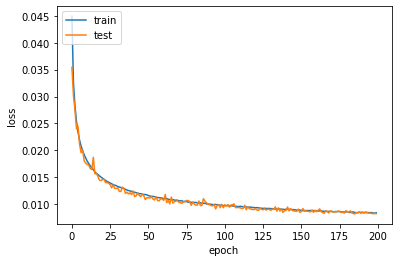

In [26]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
np.savetxt(lossfile, history.history['loss'], delimiter=",")
np.savetxt(val_lossfile, history.history['val_loss'], delimiter=",")

In [28]:
np.savetxt(final_errors_file, werr.values, delimiter=",")

In [30]:
mse = (np.square(testy - cc)).mean(axis=None)
mse.mean()

0.07353695133320524

In [31]:
1.0-mse.mean()

0.9264630486667947